# *Machine learning final project*
## `Mohammad Ghavi`

## import require library and packages

In [1]:
# data manipulation and dataset and database
import pandas as pd

# algebra 
import numpy as np

# Data
from sklearn.datasets import load_breast_cancer

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker
%matplotlib inline

# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# machine learning estimator
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


# model evaluation and optimization and spliting the data for testing model
from sklearn.metrics import mean_absolute_error, mean_squared_error, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split

# ignoring warnings
import warnings
warnings.filterwarnings('ignore')

## read and load data  

In [2]:
data = load_breast_cancer(as_frame=True)
df = pd.concat([data['data'], data['target']], axis=1)
X = data['data']
y = data['target']
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


## Cleaning Data

In [5]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

## data visualization

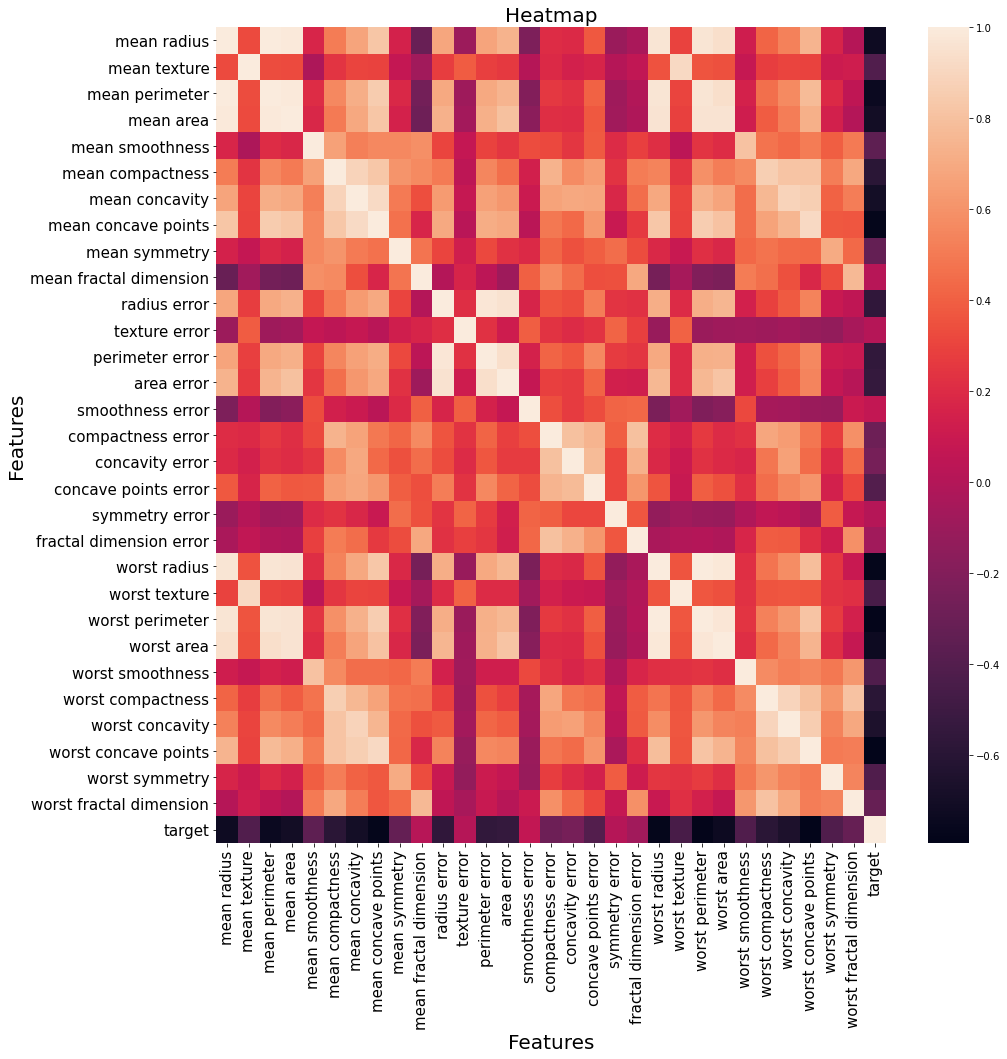

In [6]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr())
plt.title('Heatmap', size=20)
plt.yticks(size=15)
plt.xticks(size=15)
plt.xlabel('Features', size=20)
plt.ylabel('Features', size=20);

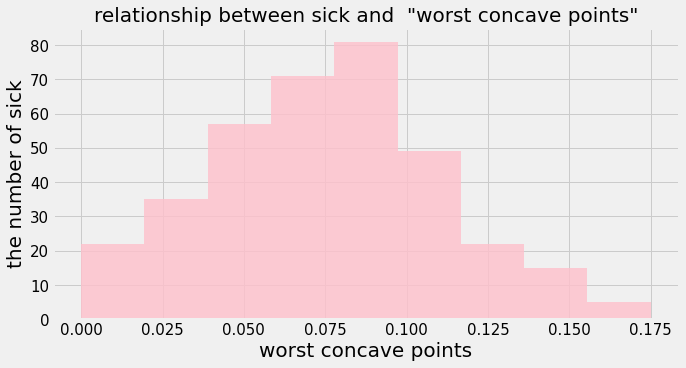

In [7]:
plt.style.use(plt.style.available[6])
plt.figure(figsize=(10,5))
plt.hist(df['worst concave points'][df['target']==1], bins=np.linspace(0, .175, 10), alpha=.8, color='pink')
plt.title('relationship between sick and  "worst concave points"', size=20)
plt.yticks(size=15)
plt.xticks(size=15)
plt.xlabel('worst concave points', size=20)
plt.ylabel('the number of sick', size=20);

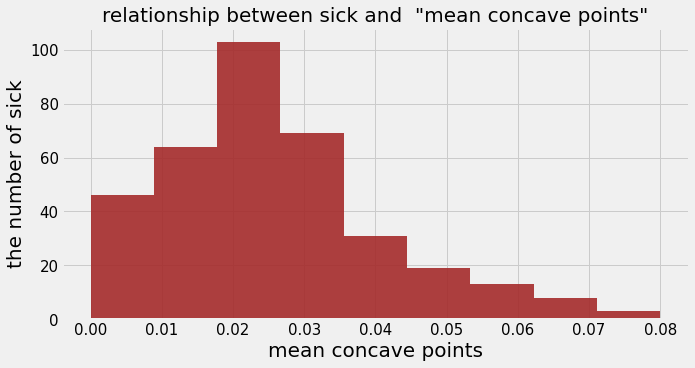

In [8]:
plt.figure(figsize=(10,5))
plt.hist(df['mean concave points'][df['target']==1], bins=np.linspace(0, .08, 10), alpha=.9, color='brown')
plt.title('relationship between sick and  "mean concave points"', size=20)
plt.yticks(size=15)
plt.xticks(size=15)
plt.xlabel('mean concave points', size=20)
plt.ylabel('the number of sick', size=20);

In [9]:
# To find the feature that has the most correlation with the mean area feature
df.corr()['mean area'].sort_values(ascending=False)[:2]

mean area      1.000000
mean radius    0.987357
Name: mean area, dtype: float64

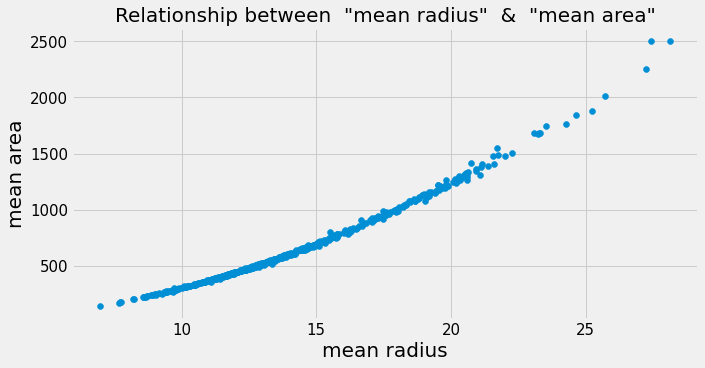

In [10]:
plt.figure(figsize=(10,5))
plt.scatter(df['mean radius'], df['mean area'])
plt.title('Relationship between  "mean radius"  &  "mean area"', size=20)
plt.yticks(size=15)
plt.xticks(size=15)
plt.xlabel('mean radius', size=20)
plt.ylabel('mean area', size=20);

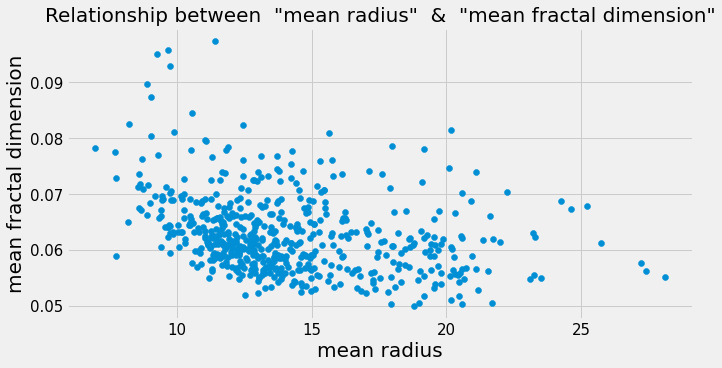

In [11]:
plt.figure(figsize=(10,5))
plt.scatter(df['mean radius'], df['mean fractal dimension'])
plt.title('Relationship between  "mean radius"  &  "mean fractal dimension"', size=20)
plt.yticks(size=15)
plt.xticks(size=15)
plt.xlabel('mean radius', size=20)
plt.ylabel('mean fractal dimension', size=20);

### Now apply dimational reduction which ploting become feasible

In [12]:
pca = PCA(n_components=2)
X_pca = pca.fit(X)
X_pca = pca.transform(X)

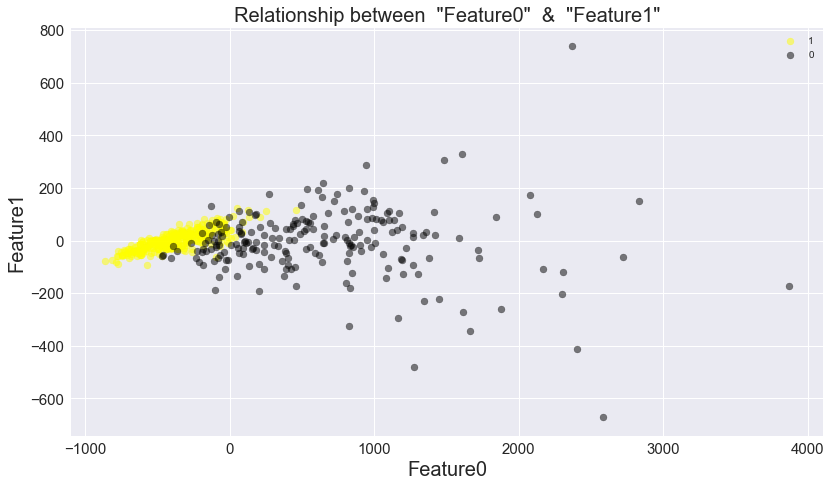

In [13]:
plt.style.use(plt.style.available[9])
plt.figure(figsize=(12,7))
plt.scatter(X_pca[:,0][y==1], X_pca[:,1][y==1], color='yellow', alpha=0.5, label='1')
plt.scatter(X_pca[:,0][y==0], X_pca[:,1][y==0], color='k', alpha=0.5, label='0')
plt.title('Relationship between  "Feature0"  &  "Feature1"', size=20)
plt.yticks(size=15)
plt.xticks(size=15)
plt.xlabel('Feature0', size=20)
plt.ylabel('Feature1', size=20)
plt.legend();

## preprocessing normalize and standardize

In [14]:
ss = StandardScaler()
X_ss = ss.fit(X)
X_ss = ss.transform(X)

## train test split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_ss, y, test_size=.3, random_state=101)

## model training and fitting 

In [16]:
svm = SVC(), {'C': [0.08, 0.085,0.075,], 'gamma': [1000,1005,995],'kernel':['linear']} 
knn = KNeighborsClassifier(), {'n_neighbors': np.arange(1, 50)} 
dtree = DecisionTreeClassifier(), {'max_depth': np.arange(0, 10)} 
rf = RandomForestClassifier(), {'n_estimators': np.arange(10, 500, 100)} 

In [17]:
estimators = [svm, knn, dtree, rf]

In [18]:
best_models = {}
for e in estimators:
    grid = GridSearchCV(*e,verbose=3)
    grid.fit(X_train,y_train)
    best_models[str(grid.best_estimator_)] = grid.best_score_

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ..............C=0.08, gamma=1000, kernel=linear; total time=   0.1s
[CV 2/5] END ..............C=0.08, gamma=1000, kernel=linear; total time=   0.0s
[CV 3/5] END ..............C=0.08, gamma=1000, kernel=linear; total time=   0.0s
[CV 4/5] END ..............C=0.08, gamma=1000, kernel=linear; total time=   0.0s
[CV 5/5] END ..............C=0.08, gamma=1000, kernel=linear; total time=   0.0s
[CV 1/5] END ..............C=0.08, gamma=1005, kernel=linear; total time=   0.0s
[CV 2/5] END ..............C=0.08, gamma=1005, kernel=linear; total time=   0.0s
[CV 3/5] END ..............C=0.08, gamma=1005, kernel=linear; total time=   0.0s
[CV 4/5] END ..............C=0.08, gamma=1005, kernel=linear; total time=   0.0s
[CV 5/5] END ..............C=0.08, gamma=1005, kernel=linear; total time=   0.0s
[CV 1/5] END ...............C=0.08, gamma=995, kernel=linear; total time=   0.0s
[CV 2/5] END ...............C=0.08, gamma=995, ke

[CV 3/5] END .................................n_neighbors=17; total time=   0.0s
[CV 4/5] END .................................n_neighbors=17; total time=   0.0s
[CV 5/5] END .................................n_neighbors=17; total time=   0.0s
[CV 1/5] END .................................n_neighbors=18; total time=   0.0s
[CV 2/5] END .................................n_neighbors=18; total time=   0.0s
[CV 3/5] END .................................n_neighbors=18; total time=   0.0s
[CV 4/5] END .................................n_neighbors=18; total time=   0.0s
[CV 5/5] END .................................n_neighbors=18; total time=   0.0s
[CV 1/5] END .................................n_neighbors=19; total time=   0.0s
[CV 2/5] END .................................n_neighbors=19; total time=   0.0s
[CV 3/5] END .................................n_neighbors=19; total time=   0.0s
[CV 4/5] END .................................n_neighbors=19; total time=   0.0s
[CV 5/5] END ...............

[CV 3/5] END .................................n_neighbors=38; total time=   0.0s
[CV 4/5] END .................................n_neighbors=38; total time=   0.0s
[CV 5/5] END .................................n_neighbors=38; total time=   0.0s
[CV 1/5] END .................................n_neighbors=39; total time=   0.0s
[CV 2/5] END .................................n_neighbors=39; total time=   0.0s
[CV 3/5] END .................................n_neighbors=39; total time=   0.0s
[CV 4/5] END .................................n_neighbors=39; total time=   0.0s
[CV 5/5] END .................................n_neighbors=39; total time=   0.0s
[CV 1/5] END .................................n_neighbors=40; total time=   0.0s
[CV 2/5] END .................................n_neighbors=40; total time=   0.0s
[CV 3/5] END .................................n_neighbors=40; total time=   0.0s
[CV 4/5] END .................................n_neighbors=40; total time=   0.0s
[CV 5/5] END ...............

[CV 2/5] END ................................n_estimators=10; total time=   0.0s
[CV 3/5] END ................................n_estimators=10; total time=   0.0s
[CV 4/5] END ................................n_estimators=10; total time=   0.0s
[CV 5/5] END ................................n_estimators=10; total time=   0.0s
[CV 1/5] END ...............................n_estimators=110; total time=   0.0s
[CV 2/5] END ...............................n_estimators=110; total time=   0.0s
[CV 3/5] END ...............................n_estimators=110; total time=   0.0s
[CV 4/5] END ...............................n_estimators=110; total time=   0.0s
[CV 5/5] END ...............................n_estimators=110; total time=   0.0s
[CV 1/5] END ...............................n_estimators=210; total time=   0.2s
[CV 2/5] END ...............................n_estimators=210; total time=   0.2s
[CV 3/5] END ...............................n_estimators=210; total time=   0.2s
[CV 4/5] END ...............

In [19]:
df_accuracy = pd.DataFrame(data = best_models.values(), index=best_models.keys(), columns=['accuracy'])
df_accuracy.sort_index(ascending=False)
df_accuracy.index.name = 'Estimators'
df_accuracy.sort_values(by='accuracy', ascending=False)

,accuracy
Estimators,
"SVC(C=0.08, gamma=1000, kernel='linear')",0.982437
KNeighborsClassifier(n_neighbors=7),0.972437
RandomForestClassifier(n_estimators=110),0.962437
DecisionTreeClassifier(max_depth=7),0.932310


In [20]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

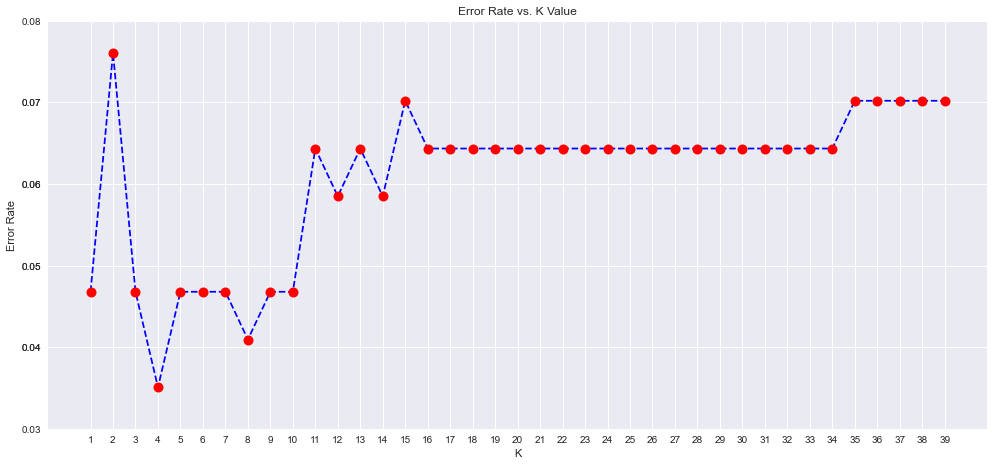

In [21]:
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
ax.set_title('Error Rate vs. K Value')
ax.set_xlabel('K')
ax.set_ylabel('Error Rate')
ax.set_xticks(list(range(1,40)))
ax.set_yticks(np.round(np.linspace(0.03, .08, 10), 2));

In [22]:
svm = SVC(C=0.1, gamma=1000, kernel='linear')
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)

In [23]:
cm = confusion_matrix(y_test, y_pred)
# Index Levels

hier_index = pd.MultiIndex.from_tuples(list(zip(['Predicted Class']*2, ['positive', 'negative'])))
hier_columns = pd.MultiIndex.from_tuples(list(zip(['===True Class===']*2, ['positive', 'negative'])))

pd.DataFrame(cm, columns=hier_columns, index=hier_index)

===True Class===         
                                 positive negative
Predicted Class positive               62        4
                negative                0      105

In [24]:
print('best estimator is SVC(C=0.08, gamma=1000, kernel=\'linear\').',
      '\nScore:',np.round(cm.diagonal().sum()/cm.sum(), 2))

best estimator is SVC(C=0.08, gamma=1000, kernel='linear'). 
Score: 0.98


# n_neighbors=7 vs n_neighbors=4 vs n_neighbors=8

In [25]:
for k in [8,4,7]:
    score = cross_val_score(KNeighborsClassifier(n_neighbors=k), X, y)
    print(f"k={k}, Score = {np.round(score.mean(),3)} +/- {np.round(score.std(),3)}")

k=8, Score = 0.928 +/- 0.026
k=4, Score = 0.921 +/- 0.02
k=7, Score = 0.926 +/- 0.026


# **`Principal component analysis with 4 components`**

`PCA` is affected by scale, so we need to scale the features in our data before applying PCA. Use `StandardScaler` from `Scikit Learn` to standardize the dataset features onto unit scale (mean = 0 and standard deviation = 1) which is a requirement for the optimal performance of many Machine Learning algorithms.

In [26]:
pca = PCA(n_components=4)
X_pca4 = pca.fit(X_ss)
X_pca4 = pca.transform(X_ss)

In [27]:
pd.DataFrame(X_pca4).head()

,0,1,2,3
0,9.192837,1.948583,-1.123166,3.633730
1,2.387802,-3.768172,-0.529293,1.118264
2,5.733896,-1.075174,-0.551748,0.912082
3,7.122953,10.275589,-3.232790,0.152547
4,3.935302,-1.948072,1.389767,2.940639


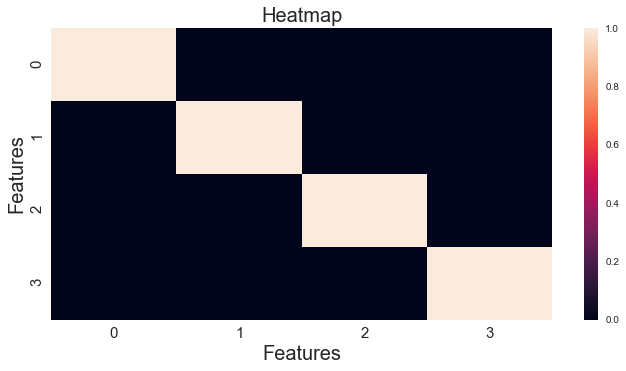

In [28]:
corr = pd.DataFrame(X_pca4).corr()
plt.figure(figsize=(10, 5))
sns.heatmap(corr)
plt.title('Heatmap', size=20)
plt.yticks(size=15)
plt.xticks(size=15)
plt.xlabel('Features', size=20)
plt.ylabel('Features', size=20);

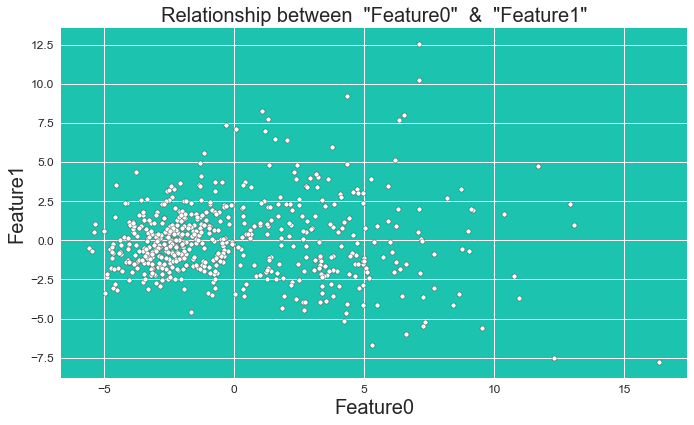

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(X_pca4[:, 0], X_pca4[:, 1],color='w', edgecolors='k', s=25)
plt.title('Relationship between  "Feature0"  &  "Feature1"', size=20)
plt.yticks(size=12)
plt.xticks(size=12)
plt.xlabel('Feature0', size=20)
plt.ylabel('Feature1', size=20)
plt.gca().set_facecolor("#1CC4AF");

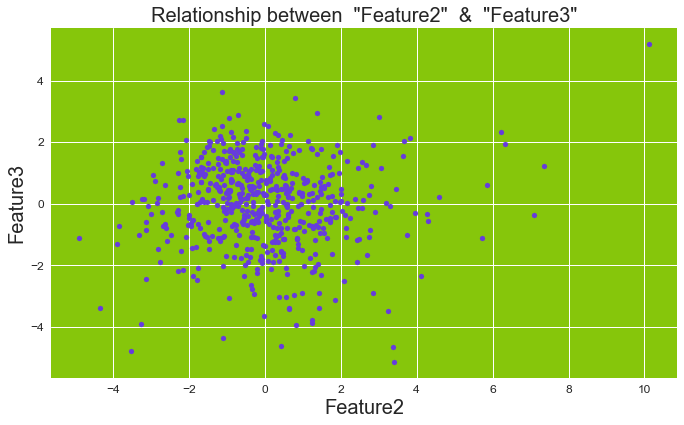

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(X_pca4[:, 2], X_pca4[:, 3], color='#663BDE', s=25)
plt.title('Relationship between  "Feature2"  &  "Feature3"', size=20)
plt.yticks(size=12)
plt.xticks(size=12)
plt.xlabel('Feature2', size=20)
plt.ylabel('Feature3', size=20)
plt.gca().set_facecolor("#86C60B");

**Relationship between  all Features**

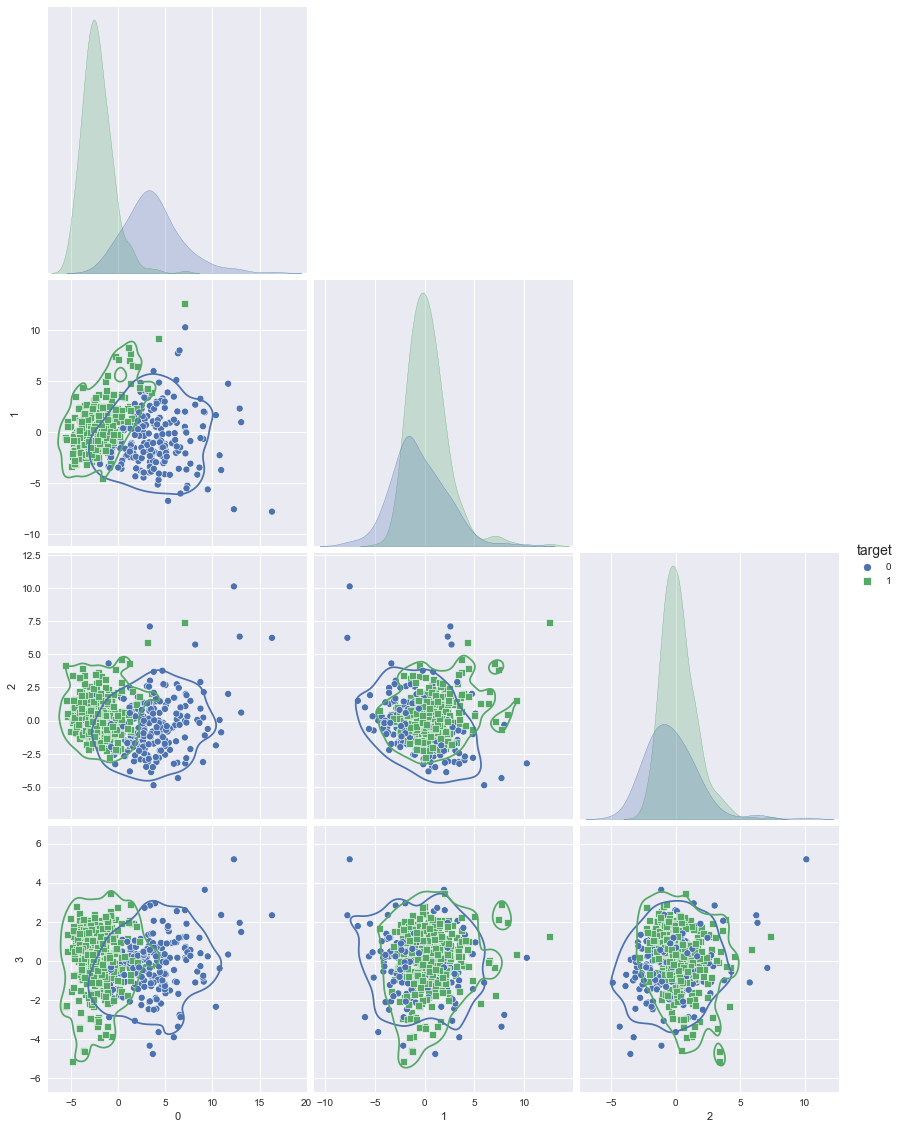

In [31]:
g = sns.pairplot(pd.concat([pd.DataFrame(X_pca4), y], axis=1), hue="target", markers=["o", "s"], corner=True, diag_kind="kde",
                    x_vars=[0, 1, 2],
                    y_vars=[0, 1, 2, 3], size=4)
g.map_lower(sns.kdeplot, levels=2, color="k");

## train test split after doing `PCA` 

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_pca4, y, test_size=.3, random_state=101)

In [33]:
svm = SVC(), {'C': [0.01, 0.1,1,], 'gamma': [1000,100,10,1,0.1,0.01,0.001],'kernel':['linear']} 
knn = KNeighborsClassifier(), {'n_neighbors': np.arange(1, 50)} 
dtree = DecisionTreeClassifier(), {'max_depth': np.arange(0, 10)} 
rf = RandomForestClassifier(), {'n_estimators': np.arange(10, 500, 100)} 

In [34]:
estimators = [svm, knn, dtree, rf]

In [35]:
best_models = {}
for e in estimators:
    grid = GridSearchCV(*e,verbose=3)
    grid.fit(X_train,y_train)
    best_models[str(grid.best_estimator_)] = grid.best_score_

Fitting 5 folds for each of 21 candidates, totalling 105 fits
[CV 1/5] END ..............C=0.01, gamma=1000, kernel=linear; total time=   0.0s
[CV 2/5] END ..............C=0.01, gamma=1000, kernel=linear; total time=   0.0s
[CV 3/5] END ..............C=0.01, gamma=1000, kernel=linear; total time=   0.0s
[CV 4/5] END ..............C=0.01, gamma=1000, kernel=linear; total time=   0.0s
[CV 5/5] END ..............C=0.01, gamma=1000, kernel=linear; total time=   0.0s
[CV 1/5] END ...............C=0.01, gamma=100, kernel=linear; total time=   0.0s
[CV 2/5] END ...............C=0.01, gamma=100, kernel=linear; total time=   0.0s
[CV 3/5] END ...............C=0.01, gamma=100, kernel=linear; total time=   0.0s
[CV 4/5] END ...............C=0.01, gamma=100, kernel=linear; total time=   0.0s
[CV 5/5] END ...............C=0.01, gamma=100, kernel=linear; total time=   0.0s
[CV 1/5] END ................C=0.01, gamma=10, kernel=linear; total time=   0.0s
[CV 2/5] END ................C=0.01, gamma=10, 

[CV 4/5] END ..................................n_neighbors=2; total time=   0.0s
[CV 5/5] END ..................................n_neighbors=2; total time=   0.0s
[CV 1/5] END ..................................n_neighbors=3; total time=   0.0s
[CV 2/5] END ..................................n_neighbors=3; total time=   0.0s
[CV 3/5] END ..................................n_neighbors=3; total time=   0.0s
[CV 4/5] END ..................................n_neighbors=3; total time=   0.0s
[CV 5/5] END ..................................n_neighbors=3; total time=   0.0s
[CV 1/5] END ..................................n_neighbors=4; total time=   0.0s
[CV 2/5] END ..................................n_neighbors=4; total time=   0.0s
[CV 3/5] END ..................................n_neighbors=4; total time=   0.0s
[CV 4/5] END ..................................n_neighbors=4; total time=   0.0s
[CV 5/5] END ..................................n_neighbors=4; total time=   0.0s
[CV 1/5] END ...............

[CV 3/5] END .................................n_neighbors=26; total time=   0.0s
[CV 4/5] END .................................n_neighbors=26; total time=   0.0s
[CV 5/5] END .................................n_neighbors=26; total time=   0.0s
[CV 1/5] END .................................n_neighbors=27; total time=   0.0s
[CV 2/5] END .................................n_neighbors=27; total time=   0.0s
[CV 3/5] END .................................n_neighbors=27; total time=   0.0s
[CV 4/5] END .................................n_neighbors=27; total time=   0.0s
[CV 5/5] END .................................n_neighbors=27; total time=   0.0s
[CV 1/5] END .................................n_neighbors=28; total time=   0.0s
[CV 2/5] END .................................n_neighbors=28; total time=   0.0s
[CV 3/5] END .................................n_neighbors=28; total time=   0.0s
[CV 4/5] END .................................n_neighbors=28; total time=   0.0s
[CV 5/5] END ...............

[CV 2/5] END ................................n_estimators=10; total time=   0.0s
[CV 3/5] END ................................n_estimators=10; total time=   0.0s
[CV 4/5] END ................................n_estimators=10; total time=   0.0s
[CV 5/5] END ................................n_estimators=10; total time=   0.0s
[CV 1/5] END ...............................n_estimators=110; total time=   0.0s
[CV 2/5] END ...............................n_estimators=110; total time=   0.0s
[CV 3/5] END ...............................n_estimators=110; total time=   0.0s
[CV 4/5] END ...............................n_estimators=110; total time=   0.0s
[CV 5/5] END ...............................n_estimators=110; total time=   0.0s
[CV 1/5] END ...............................n_estimators=210; total time=   0.2s
[CV 2/5] END ...............................n_estimators=210; total time=   0.2s
[CV 3/5] END ...............................n_estimators=210; total time=   0.1s
[CV 4/5] END ...............

In [36]:
best_models

{"SVC(C=0.1, gamma=1000, kernel='linear')": 0.9623734177215189,
 'KNeighborsClassifier(n_neighbors=11)': 0.9648417721518987,
 'DecisionTreeClassifier(max_depth=6)': 0.9373101265822786,
 'RandomForestClassifier(n_estimators=110)': 0.957373417721519}

In [37]:
df_accuracy = pd.DataFrame(data = best_models.values(), index=best_models.keys(), columns=['accuracy'])
df_accuracy.sort_index(ascending=False)
df_accuracy.index.name = 'Estimators'
df_accuracy.sort_values(by='accuracy', ascending=False)

,accuracy
Estimators,
KNeighborsClassifier(n_neighbors=11),0.964842
"SVC(C=0.1, gamma=1000, kernel='linear')",0.962373
RandomForestClassifier(n_estimators=110),0.957373
DecisionTreeClassifier(max_depth=6),0.937310


## n_neighbors=12 vs n_neighbors=11 after doing `PCA` 

In [38]:
for k in [11, 12]:
    score = cross_val_score(KNeighborsClassifier(n_neighbors=k), X_pca, y)
    print(f"k={k}, Score = {np.round(score.mean(),3)} +/- {np.round(score.std(),3)}")

k=11, Score = 0.93 +/- 0.028
k=12, Score = 0.931 +/- 0.028


## model training and fitting after doing `PCA`

In [39]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [40]:
cm = confusion_matrix(y_test, y_pred)
# Index Levels

hier_index = pd.MultiIndex.from_tuples(list(zip(['Predicted Class']*2, ['positive', 'negative'])))
hier_columns = pd.MultiIndex.from_tuples(list(zip(['===True Class===']*2, ['positive', 'negative'])))

pd.DataFrame(cm, columns=hier_columns, index=hier_index)

===True Class===         
                                 positive negative
Predicted Class positive               60        6
                negative                2      103

In [41]:
print('best estimator is KNeighborsClassifier(n_neighbors=11).',
      '\nScore:',np.round(cm.diagonal().sum()/cm.sum(), 3))

best estimator is KNeighborsClassifier(n_neighbors=11). 
Score: 0.953


# conclusion

the accuracy of the model after dimensionality reduction is reduced.


the best estimator when using the `all features` is **SVC(C=0.08, gamma=1000, kernel='linear')** with score **98%** <br> 
the best estimator when using `PCA` with 4 components is **KNeighborsClassifier(n_neighbors=11)** with score **95%**


so with this practice, we can figure out which after dimensionality reduction, the model accuracy becomes lower.